In [163]:
# Call necessary mathematical and numerical libraries
from numpy import frompyfunc, linspace, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad

# Call plotting library
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the y tick labels
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels

In [164]:
#Define functions for 3D system

infty = 100
kT_A  = 0.013   # Boltzmann constant times temperature
a = 5.44        # Normalization factor A
C2 = 1/(4*pi)
C3 = 1/(6*pi*pi)
kph = a*(kT_A)


# Define kernel:
def L0c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((1+N)/N) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def L1c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((1+N)/N)*x* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def L2c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((1+N)/N) * (x**2)* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def L0v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((1+N)/N) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def L1v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((1+N)/N)*x* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def L2v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((1+N)/N) * (x**2)* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C3*(a*(kT_A)**(1/N))*I

def S_c(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],n,W)/L0c(x[i],n,W)
    return sc

def sigma_c(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],n,W)
    return sgm

def kappa_c(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],n,W)-(L1c(x[i],n,W)**2/L0c(x[i],n,W)))
    return kpp

def S_v(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1v(x[i],n,W)/L0v(x[i],n,W)
    return sc

def sigma_v(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0v(x[i],n,W)
    return sgm

def kappa_v(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2v(x[i],n,W)-(L1v(x[i],n,W)**2/L0v(x[i],n,W)))
    return kpp

def sigma(x,m,n,W):
    return sigma_c(x,m,W)+sigma_v(x,n,W)

def S(x,m,n,W):
    return (sigma_c(x,m,W)*S_c(x,m,W)+sigma_v(x,n,W)*S_v(x,n,W))/sigma(x,m,n,W)

def kappa(x,m,n,W):
    return kappa_c(x,m,W)+kappa_v(x,n,W)+(sigma_c(x,m,W)*sigma_v(x,n,W)*(S_c(x,m,W)-S_v(x,n,W))**2)/sigma(x,m,n,W)


def PF(Sc,Sgm):
    return (Sc**2)*Sgm

def ZT(x,m,n,W,alpha):
    return (S(x,m,n,W)**2 * sigma(x,m,n,W))/(kappa(x,m,n,W) + alpha)

npoint = 201
eta = linspace(-10, 10, npoint)

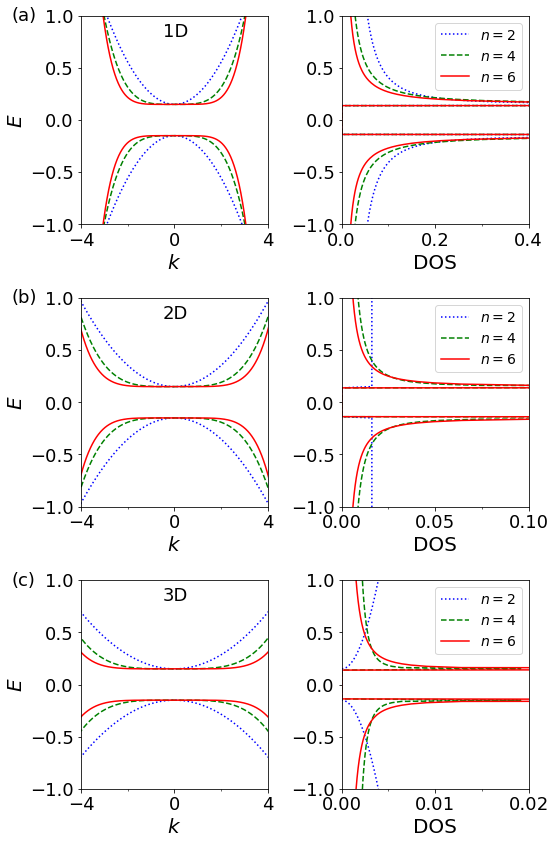

In [165]:
#Plotting the band structure and density of states

#--- generating DOS data ---#

def DOS(E,d,n):
    ds = zeros(E.size)
    for i in range(E.size):
        if(E[i]>0.15):
            ds[i] = (1/n)*(1/pi*d**0.5)**d*(E[i]-0.15)**(-1+d/n)
        elif(-0.15<E[i]<0.15):
            ds[i]=0
        else:
            ds[i] = (1/n)*(1/pi*d**0.5)**d*(-E[i]-0.15)**(-1+d/n)
    return ds

eta = linspace(-6,6,1000)
plt.figure(figsize=(8,12))

#--- 1D Dispersion and DOS 1D ---#

ax1 = plt.subplot(3,2,1)
plt.plot(eta, (eta/pi)**2 + 0.15, 'b:', label="$n=2$")
plt.plot(eta, -(eta/pi)**2 - 0.15, 'b:', label="$n=2$")
plt.plot(eta, (eta/pi)**4 + 0.15, 'g--', label="$n=4$")
plt.plot(eta, -(eta/pi)**4 - 0.15, 'g--', label="$n=4$")
plt.plot(eta, (eta/pi)**6 + 0.15, 'r-', label="$n=6$")
plt.plot(eta, -(eta/pi)**6 - 0.15, 'r-', label="$n=6$")
plt.axis([-4,4,-1,1]) # the format is [xmin,xmax,ymin,ymax]
ax1.set_xticks([-4,0,4])
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.text(-7,0.95,'(a)',fontsize='18')
plt.text(-0.5,0.8,'1D',fontsize='18')
plt.xlabel('$k$')
plt.ylabel('$E$')

ax2 = plt.subplot(3,2,2)
plt.plot(DOS(eta,1,2)/pi, eta, 'b:', label="$n=2$")
plt.plot(DOS(eta,1,4)/pi, eta, 'g--', label="$n=4$")
plt.plot(DOS(eta,1,6)/pi, eta, 'r-', label="$n=6$")
plt.axis([0,0.4,-1,1]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(arange(0,0.41,step=0.2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('DOS')
plt.tight_layout()
plt.legend(fontsize='14')

#--- 2D Dispersion and DOS ---#
ax3 = plt.subplot(3,2,3)
plt.plot(eta, (eta/(1.41*pi))**2 + 0.15, 'b:', label="$n=2$")
plt.plot(eta, -(eta/(1.41*pi))**2 - 0.15, 'b:', label="$n=2$")
plt.plot(eta, (eta/(1.41*pi))**4 + 0.15, 'g--', label="$n=4$")
plt.plot(eta, -(eta/(1.41*pi))**4 - 0.15, 'g--', label="$n=4$")
plt.plot(eta, (eta/(1.41*pi))**6 + 0.15, 'r-', label="$n=6$")
plt.plot(eta, -(eta/(1.41*pi))**6 - 0.15, 'r-', label="$n=6$")
plt.axis([-4,4,-1,1]) # the format is [xmin,xmax,ymin,ymax]
ax3.set_xticks([-4,0,4])
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.text(-7,0.95,'(b)',fontsize='18')
plt.text(-0.5,0.8,'2D',fontsize='18')
plt.xlabel('$k$')
plt.ylabel('$E$')

ax4 = plt.subplot(3,2,4)
plt.plot(DOS(eta,2,2)/(2*pi), eta, 'b:', label="$n=2$")
plt.plot(DOS(eta,2,4)/(2*pi), eta, 'g--', label="$n=4$")
plt.plot(DOS(eta,2,6)/(2*pi), eta, 'r-', label="$n=6$")
plt.axis([0,0.1,-1,1]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(arange(0,0.11,step=0.05))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('DOS')
plt.tight_layout()
plt.legend(fontsize='14')

#--- 3D Dispersion and DOS ---#
ax5 = plt.subplot(3,2,5)
plt.plot(eta, (eta/(1.73*pi))**2 + 0.15, 'b:', label="$n=2$")
plt.plot(eta, -(eta/(1.73*pi))**2 - 0.15, 'b:', label="$n=2$")
plt.plot(eta, (eta/(1.73*pi))**4 + 0.15, 'g--', label="$n=4$")
plt.plot(eta, -(eta/(1.73*pi))**4 - 0.15, 'g--', label="$n=4$")
plt.plot(eta, (eta/(1.73*pi))**6 + 0.15, 'r-', label="$n=6$")
plt.plot(eta, -(eta/(1.73*pi))**6 - 0.15, 'r-', label="$n=6$")
plt.axis([-4,4,-1,1]) # the format is [xmin,xmax,ymin,ymax]
ax5.set_xticks([-4,0,4])
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.text(-7,0.95,'(c)',fontsize='18')
plt.text(-0.5,0.8,'3D',fontsize='18')
plt.xlabel('$k$')
plt.ylabel('$E$')

ax6 = plt.subplot(3,2,6)
plt.plot(DOS(eta,3,2)/(2*pi*pi), eta, 'b:', label="$n=2$")
plt.plot(DOS(eta,3,4)/(2*pi*pi), eta, 'g--', label="$n=4$")
plt.plot(DOS(eta,3,6)/(2*pi*pi), eta, 'r-', label="$n=6$")
plt.axis([0,0.02,-1,1]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(arange(0,0.021,step=0.01))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('DOS')
plt.tight_layout()
plt.legend(fontsize='14')

plt.savefig('Fig1.pdf')

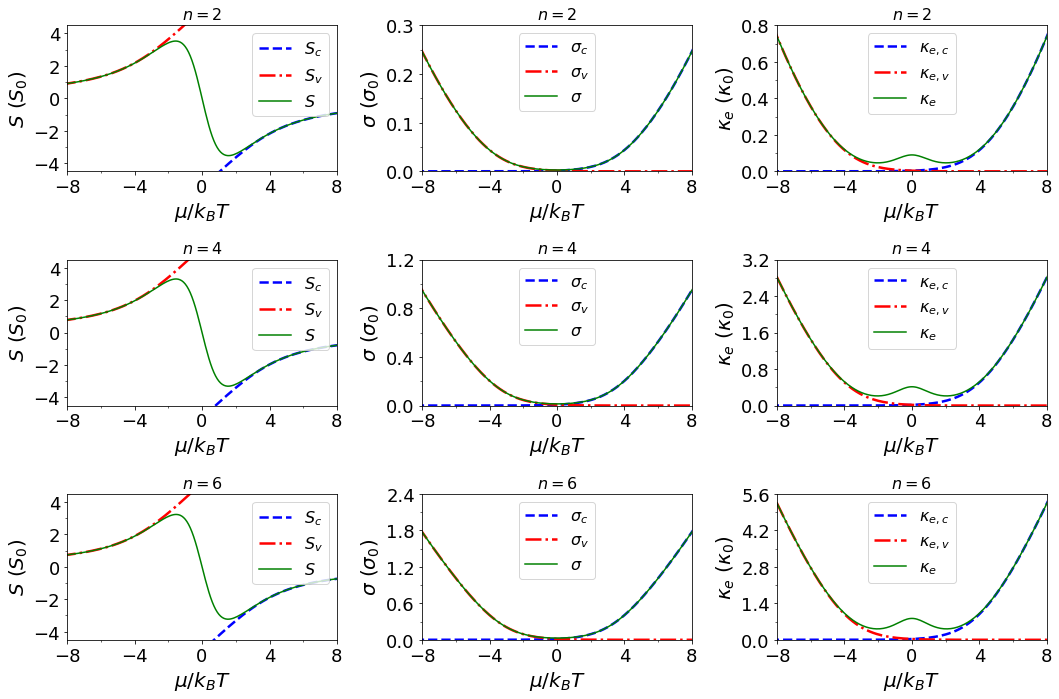

In [166]:
npoint = 201
eta = linspace(-10, 10, npoint) 

plt.figure(figsize=(15,10))

#--- n = 2 ---#
ax1 = plt.subplot(3,3,1)
plt.plot(eta, S_c(eta,2,3), 'b--', label="$S_c$", linewidth=2.5)
plt.plot(eta, S_v(eta,2,3), 'r-.', label="$S_v$", linewidth=2.5)
plt.plot(eta, S(eta,2,2,3), 'g-', label="$S$")
plt.axis([-8,8,-4.5,4.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(-4,4.1,step=2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S~(S_0)$')
plt.title(r'$n = 2$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax2 = plt.subplot(3,3,2)
plt.plot(eta, sigma_c(eta,2,3), 'b--', label="$\sigma_c$", linewidth=2.5)
plt.plot(eta, sigma_v(eta,2,3), 'r-.', label="$\sigma_v$", linewidth=2.5)
plt.plot(eta, sigma(eta,2,2,3), 'g-', label="$\sigma$")
plt.axis([-8,8,0,0.3]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,0.4,step=0.1))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.title(r'$n = 2$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

ax3 = plt.subplot(3,3,3)
plt.plot(eta, kappa_c(eta,2,3), 'b--', label="$\kappa_{e,c}$", linewidth=2.5)
plt.plot(eta, kappa_v(eta,2,3), 'r-.', label="$\kappa_{e,v}$", linewidth=2.5)
plt.plot(eta, kappa(eta,2,2,3), 'g-', label="$\kappa_e$")
plt.axis([-8,8,0,0.8]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,0.9,step=0.2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title(r'$n = 2$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

#--- n = 4 ---#
ax4 = plt.subplot(3,3,4)
plt.plot(eta, S_c(eta,4,3), 'b--', label="$S_c$", linewidth=2.5)
plt.plot(eta, S_v(eta,4,3), 'r-.', label="$S_v$", linewidth=2.5)
plt.plot(eta, S(eta,4,4,3), 'g-', label="$S$")
plt.axis([-8,8,-4.5,4.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(-4,4.1,step=2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S~(S_0)$')
plt.title(r'$n = 4$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax5 = plt.subplot(3,3,5)
plt.plot(eta, sigma_c(eta,4,3), 'b--', label="$\sigma_c$", linewidth=2.5)
plt.plot(eta, sigma_v(eta,4,3), 'r-.', label="$\sigma_v$", linewidth=2.5)
plt.plot(eta, sigma(eta,4,4,3), 'g-', label="$\sigma$")
plt.axis([-8,8,0,1.2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,1.3,step=0.4))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.title(r'$n = 4$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

ax6 = plt.subplot(3,3,6)
plt.plot(eta, kappa_c(eta,4,3), 'b--', label="$\kappa_{e,c}$", linewidth=2.5)
plt.plot(eta, kappa_v(eta,4,3), 'r-.', label="$\kappa_{e,v}$", linewidth=2.5)
plt.plot(eta, kappa(eta,4,4,3), 'g-', label="$\kappa_e$")
plt.axis([-8,8,0,3.2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,3.3,step=0.8))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title(r'$n = 4$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

#--- n = 6 ---#
ax7 = plt.subplot(3,3,7)
plt.plot(eta, S_c(eta,6,3), 'b--', label="$S_c$", linewidth=2.5)
plt.plot(eta, S_v(eta,6,3), 'r-.', label="$S_v$", linewidth=2.5)
plt.plot(eta, S(eta,6,6,3), 'g-', label="$S$")
plt.axis([-8,8,-4.5,4.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax7.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(-4,4.1,step=2))
ax7.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S~(S_0)$')
plt.title(r'$n = 6$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax8 = plt.subplot(3,3,8)
plt.plot(eta, sigma_c(eta,6,3), 'b--', label="$\sigma_c$", linewidth=2.5)
plt.plot(eta, sigma_v(eta,6,3), 'r-.', label="$\sigma_v$", linewidth=2.5)
plt.plot(eta, sigma(eta,6,6,3), 'g-', label="$\sigma$")
plt.axis([-8,8,0,2.4]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax8.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,2.5,step=0.6))
ax8.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.title(r'$n = 6$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

ax9 = plt.subplot(3,3,9)
plt.plot(eta, kappa_c(eta,6,3), 'b--', label="$\kappa_{e,c}$", linewidth=2.5)
plt.plot(eta, kappa_v(eta,6,3), 'r-.', label="$\kappa_{e,v}$", linewidth=2.5)
plt.plot(eta, kappa(eta,6,6,3), 'g-', label="$\kappa_e$")
plt.axis([-8,8,0,5.6]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax9.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,5.7,step=1.4))
ax9.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title(r'$n = 6$',fontsize=16)
plt.legend(loc='upper center')
plt.tight_layout()

plt.savefig('Fig2.pdf')

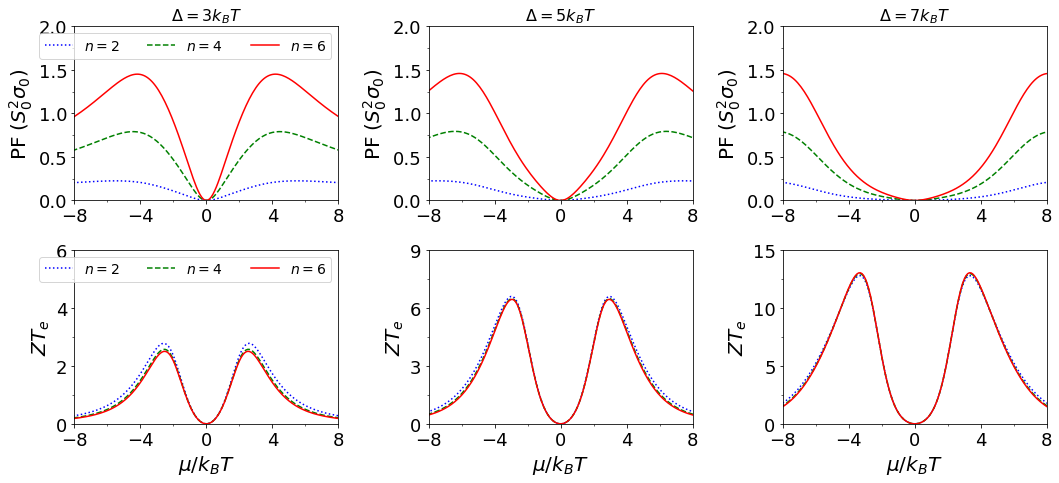

In [167]:
plt.figure(figsize=(15,7))

#--- Power Factor ---#
ax1 = plt.subplot(2,3,1)
plt.plot(eta, S(eta,2,2,3)**2*sigma(eta,2,2,3), 'b:', label="$n=2$")
plt.plot(eta, S(eta,4,4,3)**2*sigma(eta,4,4,3), 'g--', label="$n=4$")
plt.plot(eta, S(eta,6,6,3)**2*sigma(eta,6,6,3), 'r-', label="$n=6$")
plt.axis([-8,8,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.title('$\Delta=3 k_B T$', fontsize=16)
plt.legend(ncol=3, fontsize=14)
plt.tight_layout()

ax2 = plt.subplot(2,3,2)
plt.plot(eta, S(eta,2,2,5)**2*sigma(eta,2,2,5), 'b:', label="$n=2$")
plt.plot(eta, S(eta,4,4,5)**2*sigma(eta,4,4,5), 'g--', label="$n=4$")
plt.plot(eta, S(eta,6,6,5)**2*sigma(eta,6,6,5), 'r-', label="$n=6$")
plt.axis([-8,8,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.title('$\Delta=5 k_B T$',fontsize=16)
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.tight_layout()

ax3 = plt.subplot(2,3,3)
plt.plot(eta, S(eta,2,2,7)**2*sigma(eta,2,2,7), 'b:', label="$n=2$")
plt.plot(eta, S(eta,4,4,7)**2*sigma(eta,4,4,7), 'g--', label="$n=4$")
plt.plot(eta, S(eta,6,6,7)**2*sigma(eta,6,6,7), 'r-', label="$n=6$")
plt.axis([-8,8,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.title('$\Delta=7k_B T$',fontsize=16)
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.tight_layout()

#--- ZT ---#
ax4 = plt.subplot(2,3,4)
ax4.plot(eta, ZT(eta,2,2,3,0), 'b:', label="$n=2$")
ax4.plot(eta, ZT(eta,4,4,3,0), 'g--', label="$n=4$")
ax4.plot(eta, ZT(eta,6,6,3,0), 'r-', label="$n=6$")
plt.axis([-8,8,0,6]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
plt.yticks(arange(0,6.1,step=2))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$ZT_e$')
plt.legend(ncol=3, fontsize=14)
plt.tight_layout()

ax5 = plt.subplot(2,3,5)
ax5.plot(eta, ZT(eta,2,2,5,0), 'b:', label="$n=2$")
ax5.plot(eta, ZT(eta,4,4,5,0), 'g--', label="$n=4$")
ax5.plot(eta, ZT(eta,6,6,5,0), 'r-', label="$n=6$")
plt.axis([-8,8,0,9]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
plt.yticks(arange(0,9.1,step=3))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$ZT_e$')
plt.tight_layout()

ax6 = plt.subplot(2,3,6)
ax6.plot(eta, ZT(eta,2,2,7,0), 'b:', label="$n=2$")
ax6.plot(eta, ZT(eta,4,4,7,0), 'g--', label="$n=4$")
ax6.plot(eta, ZT(eta,6,6,7,0), 'r-', label="$n=6$")
plt.axis([-8,8,0,15]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
plt.yticks(arange(0,15.1,step=5))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$ZT_e$')
plt.tight_layout()

plt.savefig('Fig3.pdf')

In [6]:
#Finding optimal bandgap
from numpy import argmax

#CALCULATION WILL TAKE A LOT OF TIME
#Skip this and read from pre-calculated .txt files instead for figure editing

npoint = 201
eta = linspace(-10, 10, npoint) 

ndelta = 40
delta = linspace(0, 20, ndelta) 

eta = linspace(-19.99, 20.01, npoint)

def ZTmax(x,m,n,alpha):
    zt = zeros(ndelta)
    emax = zeros(ndelta)
    for i in range(delta.size):
        emax[i] = argmax(ZT(eta,m,n,x[i],alpha))
        zt[i] = max(ZT(eta,m,n,x[i],alpha))
    return zt, emax

ZT22,eta22=ZTmax(delta,2,2,1/3)
ZT24,eta24=ZTmax(delta,2,4,1/3)
ZT26,eta26=ZTmax(delta,2,6,1/3)
ZT46,eta46=ZTmax(delta,4,6,1/3)
ZT44,eta44=ZTmax(delta,4,4,1/3)
ZT66,eta66=ZTmax(delta,6,6,1/3)

In [7]:
ZT22p,eta22p=ZTmax(delta,2,2,10/3)
ZT24p,eta24p=ZTmax(delta,2,4,10/3)
ZT26p,eta26p=ZTmax(delta,2,6,10/3)
ZT46p,eta46p=ZTmax(delta,4,6,10/3)
ZT44p,eta44p=ZTmax(delta,4,4,10/3)
ZT66p,eta66p=ZTmax(delta,6,6,10/3)

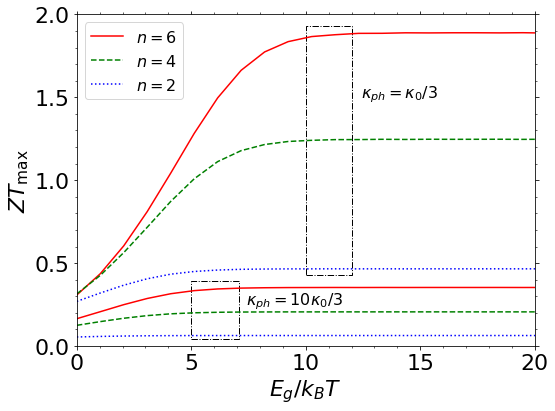

In [248]:
plt.figure(figsize=(8,6))

ax1 = plt.subplot(1,1,1)
plt.plot(2*delta,ZT66, 'r-', label="$n=6$")
plt.plot(2*delta,ZT44, 'g--', label="$n=4$")
plt.plot(2*delta,ZT22, 'b:', label="$n=2$")
plt.plot(2*delta,ZT22p, 'b:')
plt.plot(2*delta,ZT44p, 'g--')
plt.plot(2*delta,ZT66p, 'r-')
plt.axis([0,20,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=22)
plt.yticks(arange(0,2.1,step=0.5),fontsize=22)
ax1.xaxis.set_tick_params(which='major', top='on')
ax1.xaxis.set_tick_params(which='minor', top='on')
ax1.yaxis.set_tick_params(which='major', right='on')
ax1.yaxis.set_tick_params(which='minor', right='on')
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.text(12.4,1.5, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=16)
plt.text(7.4,0.25, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=16)
plt.xlabel('$E_g/k_B T$',fontsize=22)
plt.ylabel('$ZT_\mathrm{max}$',fontsize=22)
ax1.add_patch(Rectangle((10,0.43),2,1.5,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax1.add_patch(Rectangle((5,0.04),2.1,0.35,edgecolor='black',fill=False,lw=1,linestyle='-.'))
#ax1.legend(bbox_to_anchor=(0.9,1.15),ncol=3,fontsize=16)
ax1.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.savefig('Fig4.pdf')

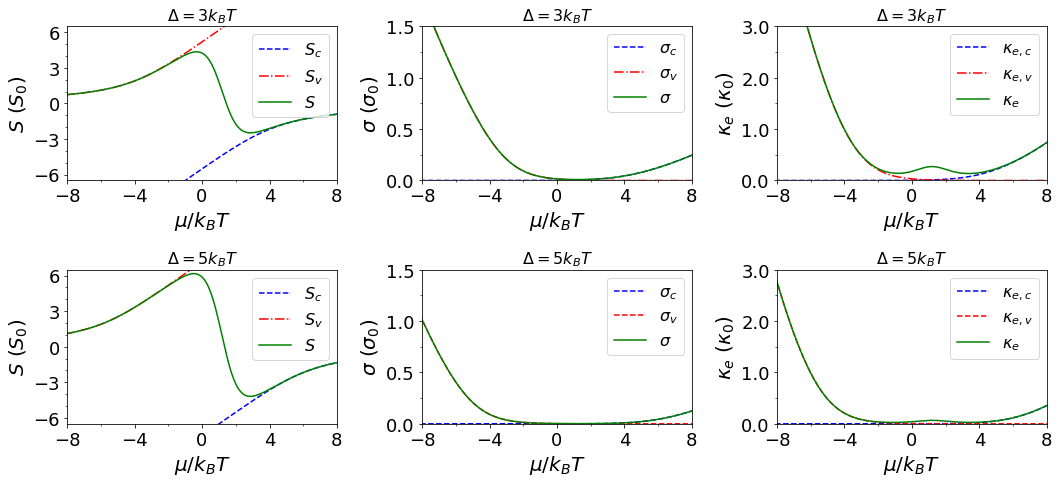

In [168]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(15,7))

ax1 = plt.subplot(2,3,1)
plt.plot(eta, S_c(eta,2,3), 'b--', label="$S_c$")
plt.plot(eta, S_v(eta,6,3), 'r-.', label="$S_v$")
plt.plot(eta, S(eta,2,6,3), 'g-', label="$S$")
plt.axis([-8,8,-6.5,6.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(-6,6.1,step=3))
ax1.yaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S~(S_0)$')
plt.title('$\Delta=3k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax2 = plt.subplot(2,3,2)
plt.plot(eta, sigma_c(eta,2,3), 'b--', label="$\sigma_c$")
plt.plot(eta, sigma_v(eta,6,3), 'r-.', label="$\sigma_v$")
plt.plot(eta, sigma(eta,2,6,3), 'g-', label="$\sigma$")
plt.axis([-8,8,0,1.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,1.6,step=0.5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.title('$\Delta=3k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax3 = plt.subplot(2,3,3)
plt.plot(eta, kappa_c(eta,2,3), 'b--', label="$\kappa_{e,c}$")
plt.plot(eta, kappa_v(eta,6,3), 'r-.', label="$\kappa_{e,v}$")
plt.plot(eta, kappa(eta,2,6,3), 'g-', label="$\kappa_e$")
plt.axis([-8,8,0,3]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,3.1,step=1))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title('$\Delta=3k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax4 = plt.subplot(2,3,4)
plt.plot(eta, S_c(eta,2,5), 'b--', label="$S_c$")
plt.plot(eta, S_v(eta,6,5), 'r-.', label="$S_v$")
plt.plot(eta, S(eta,2,6,5), 'g-', label="$S$")
plt.axis([-8,8,-6.5,6.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(-6,6.1,step=3))
ax4.yaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S~(S_0)$')
plt.title('$\Delta=5k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax5 = plt.subplot(2,3,5)
plt.plot(eta, sigma_c(eta,2,5), 'b--', label="$\sigma_c$")
plt.plot(eta, sigma_v(eta,6,5), 'r--', label="$\sigma_v$")
plt.plot(eta, sigma(eta,2,6,5), 'g-', label="$\sigma$")
plt.axis([-8,8,0,1.5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,1.6,step=0.5))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.title('$\Delta=5k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

ax6 = plt.subplot(2,3,6)
plt.plot(eta, kappa_c(eta,2,5), 'b--', label="$\kappa_{e,c}$")
plt.plot(eta, kappa_v(eta,6,5), 'r--', label="$\kappa_{e,v}$")
plt.plot(eta, kappa(eta,2,6,5), 'g-', label="$\kappa_e$")
plt.axis([-8,8,0,3]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.yticks(arange(0,3.1,step=1))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title('$\Delta=5k_B T$',fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('Fig5.pdf')

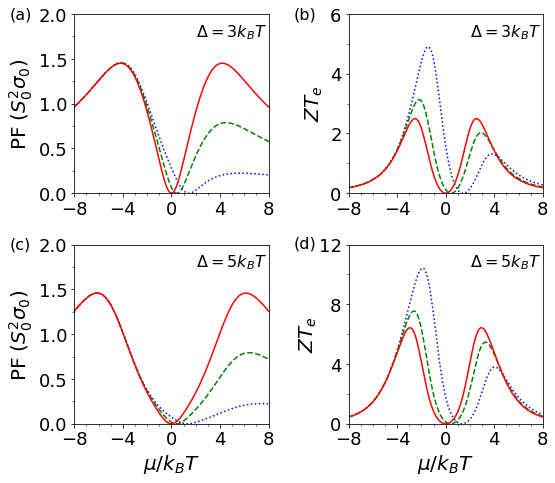

In [178]:
plt.figure(figsize=(8,7))

#--- PF \Delta 3 k_B T ---#
ax1 = plt.subplot(2,2,1)
plt.plot(eta, S(eta,2,6,3)**2*sigma(eta,2,6,3), 'b:', label="$m = 2, n=6$")
plt.plot(eta, S(eta,4,6,3)**2*sigma(eta,4,6,3), 'g--', label="$m = 4, n=6$")
plt.plot(eta, S(eta,6,6,3)**2*sigma(eta,6,6,3), 'r-', label="$m = 6, n=6$")
plt.axis([-8,8,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.text(2,1.75, r'$\Delta=3 k_B T$')
plt.text(-13.3,1.95, '(a)')

#--- ZT_e \Delta 3 k_B T ---#
ax2 = plt.subplot(2,2,2)
plt.plot(eta, ZT(eta,2,6,3,0), 'b:', label="$m = 2, n=6$")
plt.plot(eta, ZT(eta,4,6,3,0), 'g--', label="$m = 4, n=6$")
plt.plot(eta, ZT(eta,6,6,3,0), 'r-', label="$m = 6, n=6$")
plt.axis([-8,8,0,6]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad=5
plt.ylabel('$ZT_e$')
plt.text(2,5.25, r'$\Delta=3 k_B T$')
plt.text(-12.5,5.85, '(b)')

#--- PF \Delta 5 k_B T ---#
ax3 = plt.subplot(2,2,3)
plt.plot(eta, S(eta,2,6,5)**2*sigma(eta,2,6,5), 'b:', label="$m = 2, n=6$")
plt.plot(eta, S(eta,4,6,5)**2*sigma(eta,4,6,5), 'g--', label="$m = 4, n=6$")
plt.plot(eta, S(eta,6,6,5)**2*sigma(eta,6,6,5), 'r-', label="$m = 6, n=6$")
plt.axis([-8,8,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel('$\mu/k_B T$')
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.text(2,1.75, r'$\Delta=5 k_B T$')
plt.text(-13.3,1.95, '(c)')

#--- ZT_e \Delta 5 k_B T ---#
ax4 = plt.subplot(2,2,4)
plt.plot(eta, ZT(eta,2,6,5,0), 'b:', label="$m = 2, n=6$")
plt.plot(eta, ZT(eta,4,6,5,0), 'g--', label="$m = 4, n=6$")
plt.plot(eta, ZT(eta,6,6,5,0), 'r-', label="$m = 6, n=6$")
plt.axis([-8,8,0,12]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(-8,9,4))
plt.yticks(range(0,13,4))
ax4.xaxis.set_minor_locator(AutoMinorLocator(4))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad=0
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$ZT_e$')
plt.text(2,10.5, r'$\Delta=5 k_B T$')
plt.text(-12.5,11.8, '(d)')

plt.tight_layout()
plt.savefig('Fig6.pdf')

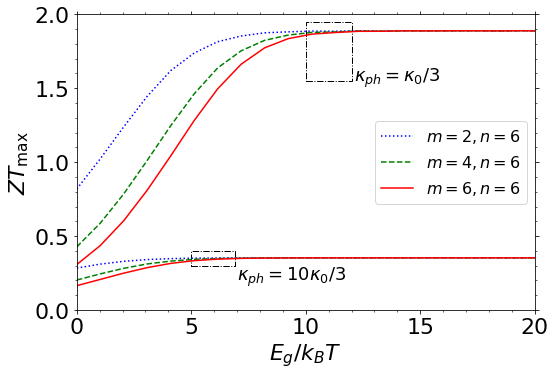

In [245]:
plt.figure(figsize=(8,5.5))

ax1 = plt.subplot(1,1,1)
plt.plot(2*delta,ZT26, 'b:', label="$m=2,n=6$")
plt.plot(2*delta,ZT46, 'g--', label="$m=4,n=6$")
plt.plot(2*delta,ZT66, 'r-', label="$m=6,n=6$")
plt.plot(2*delta,ZT26p, 'b:')
plt.plot(2*delta,ZT46p, 'g--')
plt.plot(2*delta,ZT66p, 'r-')
plt.axis([0,10,0,2]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=22)
plt.yticks(arange(0,2.1,step=0.5),fontsize=22)
ax1.xaxis.set_tick_params(which='major', top='on')
ax1.xaxis.set_tick_params(which='minor', top='on')
ax1.yaxis.set_tick_params(which='major', right='on')
ax1.yaxis.set_tick_params(which='minor', right='on')
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.text(12.1,1.55, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=18)
plt.text(7,0.2, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=18)
plt.xlabel('$E_g/k_B T$',fontsize=22)
plt.ylabel('$ZT_\mathrm{max}$',fontsize=22)
plt.legend(loc='best')
ax1.add_patch(Rectangle((10,1.55),2,0.4,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax1.add_patch(Rectangle((5,0.3),1.9,0.1,edgecolor='black',fill=False,lw=1,linestyle='-.'))
plt.tight_layout()
plt.savefig('Fig7.pdf')

In [187]:
plog = frompyfunc(polylog, 2, 1)

def F0(x):
    return exp(x)/(1+exp(x))
def F1(x):
    return ( x/(1+exp(x)) + log(1+exp(-x)) )
def F2(x):
    return ( (pi**2)/3 - (x**2 / (1+exp(x)) )
            - 2*x*log(1+exp(-x)) + 2*plog(2,-exp(-x)) )
def F3(x):
    return ( (x**3)/(1+exp(x)) + 3*(x**2)*log(1+exp(-x)) - 6*x*plog(2,-exp(-x)) - 6*plog(3,-exp(-x)) )

def F0v(x):
    return 1/(1+exp(x))
def F1v(x):
    return ( x/(1+exp(-x)) - log(1+exp(x)) )
def F2v(x):
    return ( (x**2 / (1+exp(x)) ) + 2*x*log(1+exp(-x))
            - 2*plog(2,-exp(-x)) )
def F3v(x):
     return ( -(x**3)/(1+exp(x)) - 3*(x**2)*log(1+exp(-x)) + 6*x*plog(2,-exp(-x)) + 6*plog(3,-exp(-x)) )

def L0c(x,D):
    return F1(x-D)+(x-D)*F0(x-D)

def L1c(x,D):
    return F2(x-D)+(x-D)*F1(x-D)

def L2c(x,D):
    return F3(x-D)+(x-D)*F2(x-D)

def L0v(x,D):
    return -(-F1(-x-D)+(x+D)*F0(-x-D))

def L1v(x,D):
    return -(F2(-x-D)-(x+D)*F1(-x-D))

def L2v(x,D):
    return -(-F3(x+D)+(x+D)*F2(-x-D))


# Create sample points within [-10,10]:
npoint = 201
eta = linspace(-10, 10, npoint) 

#define thermoelectric coefficients
def S_c(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W)/L0c(x[i],W)
    return sc

def sigma_c(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = n*C2*L0c(x[i],W)
    return sgm

def kappa_c(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = n*C2*(L2c(x[i],W)-(L1c(x[i],W)**2/L0c(x[i],W)))
    return kpp

def S_v(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1v(x[i],W)/L0v(x[i],W)
    return sc

def sigma_v(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = n*C2*L0v(x[i],W)
    return sgm

def kappa_v(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = n*C2*(L2v(x[i],W)-(L1v(x[i],W)**2/L0v(x[i],W)))
    return kpp

def sigma(x,m,n,W):
    return sigma_c(x,m,W)+sigma_v(x,n,W)

def S(x,m,n,W):
    return (sigma_c(x,m,W)*S_c(x,m,W)+sigma_v(x,n,W)*S_v(x,n,W))/sigma(x,m,n,W)

def kappa(x,m,n,W):
    return kappa_c(x,m,W)+kappa_v(x,n,W)+(sigma_c(x,m,W)*sigma_v(x,n,W)*(S_c(x,m,W)-S_v(x,n,W))**2)/sigma(x,m,n,W)


def PF(Sc,Sgm):
    return (Sc**2)*Sgm

def ZT(x,m,n,W,alpha):
    return (S(x,m,n,W)**2 * sigma(x,m,n,W))/(kappa(x,m,n,W) + alpha)

S2_2D = S(eta,2,2,3)
S4_2D = S(eta,4,4,3)
S6_2D = S(eta,6,6,3)
sigma2_2D = sigma(eta,2,2,3)
sigma4_2D = sigma(eta,4,4,3)
sigma6_2D = sigma(eta,6,6,3)
kappa2_2D = kappa(eta,2,2,3)
kappa4_2D = kappa(eta,4,4,3)
kappa6_2D = kappa(eta,6,6,3)
PF2_2D = S(eta,2,2,3)**2*sigma(eta,2,2,3)
PF4_2D = S(eta,4,4,3)**2*sigma(eta,4,4,3)
PF6_2D = S(eta,6,6,3)**2*sigma(eta,6,6,3)
ZT2_2D = ZT(eta,2,2,3,0)
ZT4_2D = ZT(eta,4,4,3,0)
ZT6_2D = ZT(eta,6,6,3,0)

In [13]:
ndelta = 40
delta = linspace(0, 20, ndelta) 

#CALCULATION WILL TAKE A LOT OF TIME
#Skip this and read from pre-calculated .txt files instead for figure editing

eta = linspace(-19.99, 20.01, npoint)

def ZTmax(x,m,n,alpha):
    zt = zeros(ndelta)
    emax = zeros(ndelta)
    for i in range(delta.size):
        emax[i] = argmax(ZT(eta,m,n,x[i],alpha))
        zt[i] = max(ZT(eta,m,n,x[i],alpha))
    return zt,emax

ZT22_2,eta22_2=ZTmax(delta,2,2,1/3)
ZT24_2,eta24_2=ZTmax(delta,2,4,1/3)
ZT26_2,eta26_2=ZTmax(delta,2,6,1/3)
ZT46_2,eta46_2=ZTmax(delta,4,6,1/3)
ZT44_2,eta44_2=ZTmax(delta,4,4,1/3)
ZT66_2,eta66_2=ZTmax(delta,6,6,1/3)

ZT22p_2,eta22p_2=ZTmax(delta,2,2,10/3)
ZT24p_2,eta24p_2=ZTmax(delta,2,4,10/3)
ZT26p_2,eta26p_2=ZTmax(delta,2,6,10/3)
ZT46p_2,eta46p_2=ZTmax(delta,4,6,10/3)
ZT44p_2,eta44p_2=ZTmax(delta,4,4,10/3)
ZT66p_2,eta66p_2=ZTmax(delta,6,6,10/3)

In [188]:
infty = 100
kT_A  = 0.013   #Boltzmann constant times temperature
a = pi        #Normalization factor A
C1 = 1/pi
C2 = 1/(4*pi)
C3 = 1/(6*pi*pi)
kph = a*(kT_A)


# Define kernel:
def L0c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((-1+N)/N) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def L1c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((-1+N)/N)*x* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def L2c(xx,N,D):
    def integrand (x,xx):
        return (x+xx-D)**((-1+N)/N) * (x**2)* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, D-xx, infty, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def L0v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((-1+N)/N) * (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def L1v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((-1+N)/N)*x* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def L2v(xx,N,D):
    def integrand (x,xx):
        return (-x-xx-D)**((-1+N)/N) * (x**2)* (exp(x) / (exp(x)+1)**2)
    I, error = quad(integrand, -infty, -D-xx, args=(xx))
    return N*C1*((kT_A)**(-1/N)/a)*I

def S_c(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],n,W)/L0c(x[i],n,W)
    return sc

def sigma_c(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],n,W)
    return sgm

def kappa_c(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],n,W)-(L1c(x[i],n,W)**2/L0c(x[i],n,W)))
    return kpp

def S_v(x,n,W):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1v(x[i],n,W)/L0v(x[i],n,W)
    return sc

def sigma_v(x,n,W):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0v(x[i],n,W)
    return sgm

def kappa_v(x,n,W):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2v(x[i],n,W)-(L1v(x[i],n,W)**2/L0v(x[i],n,W)))
    return kpp

def sigma(x,m,n,W):
    return sigma_c(x,m,W)+sigma_v(x,n,W)

def S(x,m,n,W):
    return (sigma_c(x,m,W)*S_c(x,m,W)+sigma_v(x,n,W)*S_v(x,n,W))/sigma(x,m,n,W)

def kappa(x,m,n,W):
    return kappa_c(x,m,W)+kappa_v(x,n,W)+(sigma_c(x,m,W)*sigma_v(x,n,W)*(S_c(x,m,W)-S_v(x,n,W))**2)/sigma(x,m,n,W)


def PF(Sc,Sgm):
    return (Sc**2)*Sgm

def ZT(x,m,n,W,alpha):
    return (S(x,m,n,W)**2 * sigma(x,m,n,W))/(kappa(x,m,n,W) + alpha)

S2_1D = S(eta,2,2,3)
S4_1D = S(eta,4,4,3)
S6_1D = S(eta,6,6,3)
sigma2_1D = sigma(eta,2,2,3)
sigma4_1D = sigma(eta,4,4,3)
sigma6_1D = sigma(eta,6,6,3)
kappa2_1D = kappa(eta,2,2,3)
kappa4_1D = kappa(eta,4,4,3)
kappa6_1D = kappa(eta,6,6,3)
PF2_1D = S(eta,2,2,3)**2*sigma(eta,2,2,3)
PF4_1D = S(eta,4,4,3)**2*sigma(eta,4,4,3)
PF6_1D = S(eta,6,6,3)**2*sigma(eta,6,6,3)
ZT2_1D = ZT(eta,2,2,3,0)
ZT4_1D = ZT(eta,4,4,3,0)
ZT6_1D = ZT(eta,6,6,3,0)

In [15]:
ndelta = 40
delta = linspace(0, 20, ndelta) 

#CALCULATION WILL TAKE A LOT OF TIME
#Skip this and read from pre-calculated .txt files instead for figure editing

eta = linspace(-19.99, 20.01, npoint)

def ZTmax(x,m,n,alpha):
    zt = zeros(ndelta)
    emax = zeros(ndelta)
    for i in range(delta.size):
        emax[i] = argmax(ZT(eta,m,n,x[i],alpha))
        zt[i] = max(ZT(eta,m,n,x[i],alpha))
    return zt,emax

ZT22_1,eta22_1=ZTmax(delta,2,2,1/3)
ZT24_1,eta24_1=ZTmax(delta,2,4,1/3)
ZT26_1,eta26_1=ZTmax(delta,2,6,1/3)
ZT46_1,eta46_1=ZTmax(delta,4,6,1/3)
ZT44_1,eta44_1=ZTmax(delta,4,4,1/3)
ZT66_1,eta66_1=ZTmax(delta,6,6,1/3)

ZT22p_1,eta22p_1=ZTmax(delta,2,2,10/3)
ZT24p_1,eta24p_1=ZTmax(delta,2,4,10/3)
ZT26p_1,eta26p_1=ZTmax(delta,2,6,10/3)
ZT46p_1,eta46p_1=ZTmax(delta,4,6,10/3)
ZT44p_1,eta44p_1=ZTmax(delta,4,4,10/3)
ZT66p_1,eta66p_1=ZTmax(delta,6,6,10/3)

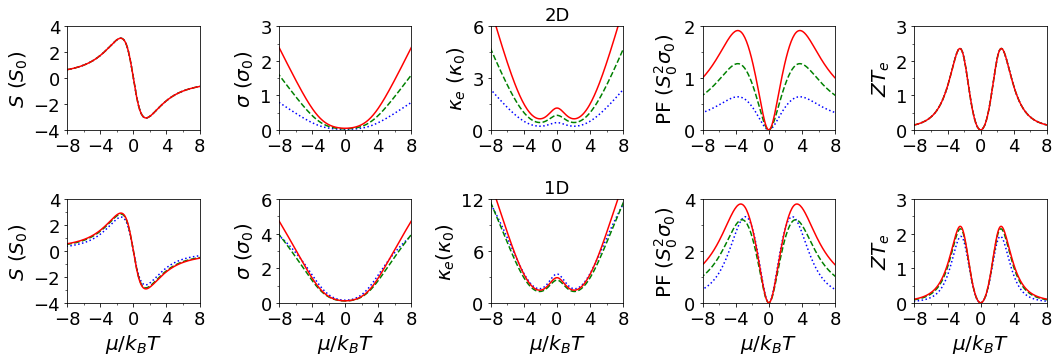

In [193]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(3,5,1)
plt.plot(eta,S2_2D,'b:')
plt.plot(eta,S4_2D,'g--')
plt.plot(eta,S6_2D,'r-')
plt.ylabel('$S~(S_0)$')
plt.axis([-8,8,-4,4])
plt.xticks(range(-8,9,4))
plt.yticks(range(-4,5,2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

ax2 = plt.subplot(3,5,2)
plt.plot(eta,sigma2_2D,'b:')
plt.plot(eta,sigma4_2D,'g--')
plt.plot(eta,sigma6_2D,'r-')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.axis([-8,8,0,3])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,4,1))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))

ax3 = plt.subplot(3,5,3)
plt.plot(eta,kappa2_2D,'b:')
plt.plot(eta,kappa4_2D,'g--')
plt.plot(eta,kappa6_2D,'r-')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.title('2D',fontsize=18)
plt.axis([-8,8,0,6])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,7,3))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))

ax4 = plt.subplot(3,5,4)
plt.plot(eta,PF2_2D,'b:')
plt.plot(eta,PF4_2D,'g--')
plt.plot(eta,PF6_2D,'r-')
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.axis([-8,8,0,2])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,3,1))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))

ax5 = plt.subplot(3,5,5)
plt.plot(eta,ZT2_2D,'b:')
plt.plot(eta,ZT4_2D,'g--')
plt.plot(eta,ZT6_2D,'r-')
plt.ylabel('$ZT_e$')
plt.axis([-8,8,0,3])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,4,1))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))

ax6 = plt.subplot(3,5,6)
plt.plot(eta,S2_1D,'b:')
plt.plot(eta,S4_1D,'g--')
plt.plot(eta,S6_1D,'r-')
plt.ylabel('$S~(S_0)$')
plt.xlabel('$\mu/k_B T$')
plt.axis([-8,8,-4,4])
plt.xticks(range(-8,9,4))
plt.yticks(range(-4,5,2))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))

ax7 = plt.subplot(3,5,7)
plt.plot(eta,sigma2_1D,'b:')
plt.plot(eta,sigma4_1D,'g--')
plt.plot(eta,sigma6_1D,'r-')
plt.ylabel('$\sigma~(\sigma_0)$')
plt.xlabel('$\mu/k_B T$')
plt.axis([-8,8,0,6])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,7,2))
ax7.xaxis.set_minor_locator(AutoMinorLocator(2))
ax7.yaxis.set_minor_locator(AutoMinorLocator(2))

ax8 = plt.subplot(3,5,8)
plt.plot(eta,kappa2_1D,'b:')
plt.plot(eta,kappa4_1D,'g--')
plt.plot(eta,kappa6_1D,'r-')
plt.ylabel('$\kappa_e~(\kappa_0)$')
plt.xlabel('$\mu/k_B T$')
plt.title('1D',fontsize=18)
plt.axis([-8,8,0,12])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,13,6))
ax8.xaxis.set_minor_locator(AutoMinorLocator(2))
ax8.yaxis.set_minor_locator(AutoMinorLocator(2))

ax9 = plt.subplot(3,5,9)
plt.plot(eta,PF2_1D,'b:')
plt.plot(eta,PF4_1D,'g--')
plt.plot(eta,PF6_1D,'r-')
plt.ylabel('PF $(S_0^2 \sigma_0)$')
plt.xlabel('$\mu/k_B T$')
plt.axis([-8,8,0,4])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,5,2))
ax9.xaxis.set_minor_locator(AutoMinorLocator(2))
ax9.yaxis.set_minor_locator(AutoMinorLocator(2))

ax10 = plt.subplot(3,5,10)
plt.plot(eta,ZT2_1D,'b:')
plt.plot(eta,ZT4_1D,'g--')
plt.plot(eta,ZT6_1D,'r-')
plt.ylabel('$ZT_e$')
plt.xlabel('$\mu/k_B T$')
plt.axis([-8,8,0,3])
plt.xticks(range(-8,9,4))
plt.yticks(range(0,4,1))
ax10.xaxis.set_minor_locator(AutoMinorLocator(2))
ax10.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.tight_layout()
plt.savefig('Fig8.pdf')

In [17]:
#Load ZT vs Delta from precalculated text files

from numpy import loadtxt

ZT22_2 = loadtxt("ZT22_2D.txt")
ZT24_2 = loadtxt("ZT24_2D.txt")
ZT26_2 = loadtxt("ZT26_2D.txt")
ZT44_2 = loadtxt("ZT44_2D.txt")
ZT46_2 = loadtxt("ZT46_2D.txt")
ZT66_2 = loadtxt("ZT66_2D.txt")
ZT22p_2 = loadtxt("ZT22p_2D.txt")
ZT24p_2 = loadtxt("ZT24p_2D.txt")
ZT26p_2 = loadtxt("ZT26p_2D.txt")
ZT44p_2 = loadtxt("ZT44p_2D.txt")
ZT46p_2 = loadtxt("ZT46p_2D.txt")
ZT66p_2 = loadtxt("ZT66p_2D.txt")
ZT22_1 = loadtxt("ZT22_1D.txt")
ZT24_1 = loadtxt("ZT24_1D.txt")
ZT26_1 = loadtxt("ZT26_1D.txt")
ZT44_1 = loadtxt("ZT44_1D.txt")
ZT46_1 = loadtxt("ZT46_1D.txt")
ZT66_1 = loadtxt("ZT66_1D.txt")
ZT22p_1 = loadtxt("ZT22p_1D.txt")
ZT24p_1 = loadtxt("ZT24p_1D.txt")
ZT26p_1 = loadtxt("ZT26p_1D.txt")
ZT44p_1 = loadtxt("ZT44p_1D.txt")
ZT46p_1 = loadtxt("ZT46p_1D.txt")
ZT66p_1 = loadtxt("ZT66p_1D.txt")
ndelta = 40
delta = linspace(0, 20, ndelta) 

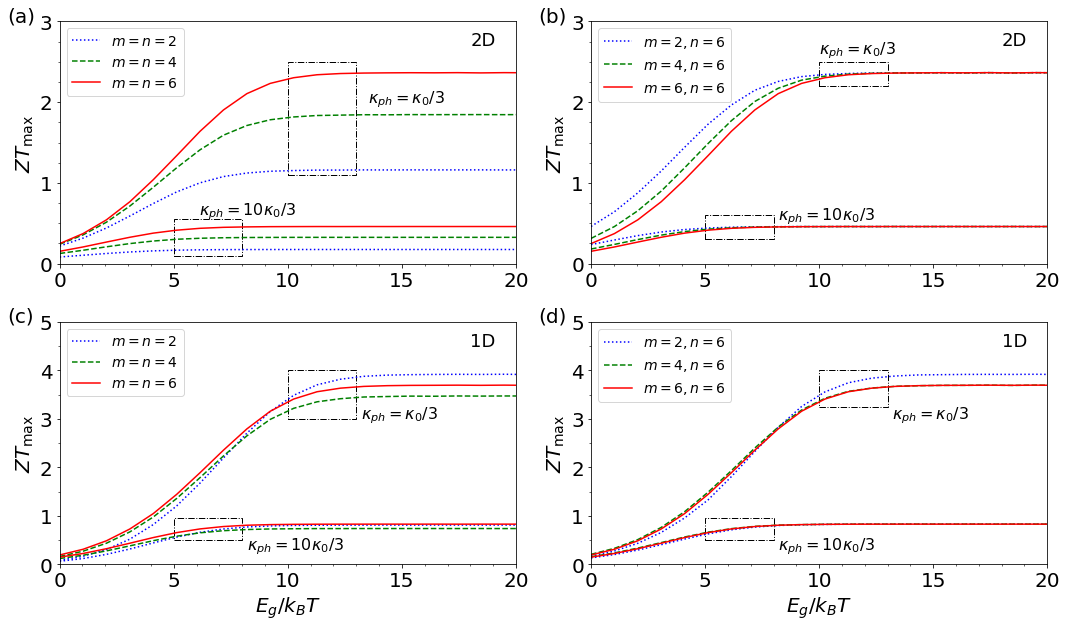

In [250]:
plt.figure(figsize=(15,9))

ax2Dmeqn = plt.subplot(2,2,1)
plt.plot(2*delta,ZT22_2, 'b:', label="$m=n=2$")
plt.plot(2*delta,ZT44_2, 'g--', label="$m=n=4$")
plt.plot(2*delta,ZT66_2, 'r-', label="$m=n=6$")
plt.plot(2*delta,ZT22p_2, 'b:')
plt.plot(2*delta,ZT44p_2, 'g--')
plt.plot(2*delta,ZT66p_2, 'r-')
plt.axis([0,20,0,3]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=20)
plt.yticks(arange(0,3.1,step=1),fontsize=20)
plt.text(13.5,2, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=16)
plt.text(6.1,0.61, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=16)
plt.text(18,2.7,'2D',fontsize=18)
plt.text(-2.3,3,'(a)',fontsize=20)
#plt.xlabel('$E_g/k_B T$',fontsize=20)
plt.ylabel('$ZT_\mathrm{max}$',fontsize=20)
plt.legend(loc='best',fontsize=14)
ax2Dmeqn.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2Dmeqn.yaxis.set_minor_locator(AutoMinorLocator(4))
ax2Dmeqn.add_patch(Rectangle((10,1.1),3,1.4,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax2Dmeqn.add_patch(Rectangle((5,0.1),3,0.45,edgecolor='black',fill=False,lw=1,linestyle='-.'))

ax1Dmeqn = plt.subplot(2,2,3)
plt.plot(2*delta,ZT22_1, 'b:', label="$m=n=2$")
plt.plot(2*delta,ZT44_1, 'g--', label="$m=n=4$")
plt.plot(2*delta,ZT66_1, 'r-', label="$m=n=6$")
plt.plot(2*delta,ZT22p_1, 'b:')
plt.plot(2*delta,ZT44p_1, 'g--')
plt.plot(2*delta,ZT66p_1, 'r-')
plt.axis([0,20,0,5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=20)
plt.yticks(arange(0,5.1,step=1),fontsize=20)
plt.text(13.2,3, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=16)
plt.text(8.2,0.3, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=16)
plt.text(18,4.5,'1D',fontsize=18)
plt.text(-2.3,5,'(c)',fontsize=20)
plt.xlabel('$E_g/k_B T$')
plt.ylabel('$ZT_\mathrm{max}$')
plt.legend(loc='best',fontsize=14)
ax1Dmeqn.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1Dmeqn.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1Dmeqn.add_patch(Rectangle((10,3),3,1,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax1Dmeqn.add_patch(Rectangle((5,0.5),3,0.45,edgecolor='black',fill=False,lw=1,linestyle='-.'))

ax2Dmneqn = plt.subplot(2,2,2)
plt.plot(2*delta,ZT26_2, 'b:', label="$m=2, n=6$")
plt.plot(2*delta,ZT46_2, 'g--', label="$m=4, n=6$")
plt.plot(2*delta,ZT66_2, 'r-', label="$m=6, n=6$")
plt.plot(2*delta,ZT26p_2, 'b:')
plt.plot(2*delta,ZT46p_2, 'g--')
plt.plot(2*delta,ZT66p_2, 'r-')
plt.axis([0,20,0,3]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=20)
plt.yticks(arange(0,3.1,step=1),fontsize=20)
plt.text(10,2.6, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=16)
plt.text(8.2,0.55, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=16)
plt.text(18,2.7,'2D',fontsize=18)
plt.text(-2.3,3,'(b)',fontsize=20)
#plt.xlabel('$E_g/k_B T$',fontsize=20)
plt.ylabel('$ZT_\mathrm{max}$',fontsize=20)
plt.legend(loc='best',fontsize=14)
ax2Dmneqn.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2Dmneqn.yaxis.set_minor_locator(AutoMinorLocator(4))
ax2Dmneqn.add_patch(Rectangle((10,2.2),3,0.3,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax2Dmneqn.add_patch(Rectangle((5,0.3),3,0.3,edgecolor='black',fill=False,lw=1,linestyle='-.'))

ax1Dmneqn = plt.subplot(2,2,4)
plt.plot(2*delta,ZT26_1, 'b:', label="$m = 2, n=6$")
plt.plot(2*delta,ZT46_1, 'g--', label="$m = 4, n=6$")
plt.plot(2*delta,ZT66_1, 'r-', label="$m = 6, n=6$")
plt.plot(2*delta,ZT26p_1, 'b:')
plt.plot(2*delta,ZT46p_1, 'g--')
plt.plot(2*delta,ZT66p_1, 'r-')
plt.axis([0,20,0,5]) # the format is [xmin,xmax,ymin,ymax]
plt.xticks(range(0,21,5),fontsize=20)
plt.yticks(arange(0,5.1,step=1),fontsize=20)
plt.text(13.2,3, r'$\kappa_{ph} = \kappa_0/3$', color='k',fontsize=16)
plt.text(8.2,0.3, r'$\kappa_{ph} = 10 \kappa_0/3$', color='k',fontsize=16)
plt.text(18,4.5,'1D',fontsize=18)
plt.text(-2.3,5,'(d)',fontsize=20)
plt.xlabel('$E_g/k_B T$')
plt.ylabel('$ZT_\mathrm{max}$')
plt.legend(loc='best',fontsize=14)
ax1Dmneqn.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1Dmneqn.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1Dmneqn.add_patch(Rectangle((10,3.25),3,0.75,edgecolor='black',fill=False,lw=1,linestyle='-.'))
ax1Dmneqn.add_patch(Rectangle((5,0.5),3,0.45,edgecolor='black',fill=False,lw=1,linestyle='-.'))

plt.tight_layout()
plt.savefig('Fig9.pdf')

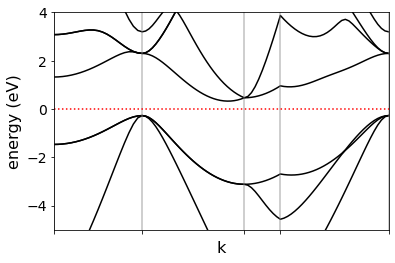

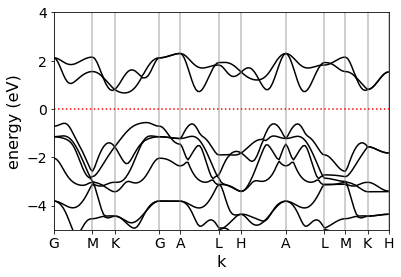

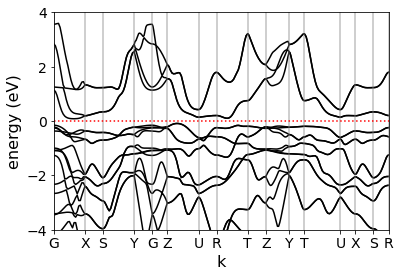

In [19]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys
import numpy as np


#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands  

SMALL_SIZE  = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the x tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the y tick labels
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels

datafile='Si.bands.gnu'
fermi = 6.5
symmetryfile='Si.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','M','K','G','A','L','H','A','L','M','K','H'],range=[-5,4])

k6 = band[3][:,0]
Ek6 = band[3][:,1]
k7 = band[4][:,0]
Ek7 = band[4][:,1]

def puddingfit(x,n):
    A = -12
    x0 = 1.63
    Delta = -0.29
    return A*(x-x0)**n+Delta

pud5 = puddingfit(k6,2)

def puddingfit(x,n):
    A = 5
    x0 = 0.85
    Delta = 0.32
    return A*(x-x0)**n+Delta

pud6 = puddingfit(k7,2)

datafile = 'Si(2).trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 6.51

EfSi = trace[:,0]*13.6 - Ef0
SSi = trace[:,4]
sigmaSi = trace[:,5]*10**(-14)
kappaSi = trace[:,7]*10**(-14)

datafile='PtS2.bands.gnu'
fermi = 7.5
symmetryfile='PtS2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','M','K','G','A','L','H','A','L','M','K','H'],range=[-5,4])

k1 = band[11][:,0]
Ek1 = band[11][:,1]
k0 = band[10][:,0]
Ek0 = band[10][:,1]

def puddingfit(x,n):
    A = -40
    x0 = 1.38
    Delta = -0.62
    return A*(x-x0)**n+Delta

pud = puddingfit(k0,4)

def puddingfit(x,n):
    A = 10
    x0 = 1.05
    Delta = 0.65
    return A*(x-x0)**n+Delta

pud2 = puddingfit(k1,2)

datafile = 'PtS2(2).trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 7.5
T0 = 350

Ef = trace[:,0]*13.6 - Ef0
S = trace[:,4]
sigma = trace[:,5]*10**(-14)
kappa = trace[:,7]*10**(-14)

datafile='FeAs2.bands.gnu'
fermi = 8.6854
symmetryfile='FeAs2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band3 = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','X','S','Y','G','Z','U','R','T','Z','Y','T','U','X','S','R'],range=[-4,4])

k4 = band3[26][:,0]
Ek4 = band3[26][:,1]
k5 = band3[25][:,0]
Ek5 = band3[25][:,1]

def puddingfit(x,n):
    A = -8
    x0 = 1.68
    Delta = -0.13
    return A*(x-x0)**n+Delta

pud3 = puddingfit(k5,6)

def puddingfit(x,n):
    A = 35
    x0 = 2.48
    Delta = 0.17
    return A*(x-x0)**n+Delta

pud4 = puddingfit(k4,6)

datafile = 'FeAs2(2).trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 8.68
T0 = 350

Ef2 = trace[:,0]*13.6 - Ef0
S2 = trace[:,4]
sigma2 = trace[:,5]*10**(-14)
kappa2 = trace[:,7]*10**(-14)


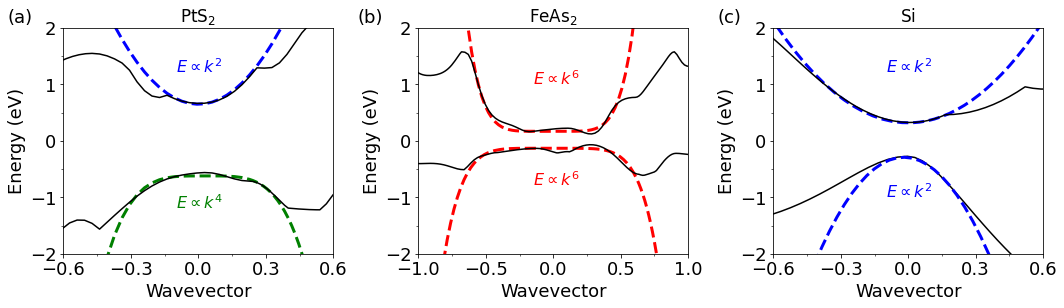

In [136]:
plt.figure(figsize=(15,4.5))

ax1 = plt.subplot(1,3,1)
plt.plot(k1-1.05,pud2,'b--', linewidth=3)
plt.plot(k1-1.05,Ek1-7.5,'k-')
plt.plot(k0-1.35,pud,'g--', linewidth=3)
plt.plot(k0-1.35,Ek0-7.5,'k-')
plt.title('$\mathrm{PtS}_2$')
plt.xlabel('Wavevector', fontsize=18)
plt.ylabel('Energy (eV)', fontsize=18)
plt.text(-0.1,1.2,r'$E\propto k^2$',color='b', fontsize=16)
plt.text(-0.1,-1.2,r'$E\propto k^4$',color='g', fontsize=16)
plt.text(-0.85,2.1,'(a)', fontsize=18)
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])
plt.xticks(arange(-0.6,0.7,step=0.3),fontsize=18)
plt.yticks(range(-2,3,1),fontsize=18)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax2 = plt.subplot(1,3,2)
plt.plot(k4-2.5,pud4,'r--', linewidth=3)
plt.plot(k4-2.5,Ek4-8.665,'k-')
plt.plot(k5-1.7,pud3,'r--', linewidth=3)
plt.plot(k5-1.7,Ek5-8.665,'k-')
plt.title('$\mathrm{FeAs}_2$')
plt.xlabel('Wavevector', fontsize=18)
plt.ylabel('Energy (eV)', fontsize=18)
plt.text(-0.15,1.0,r'$E\propto k^6$',color='r', fontsize=16)
plt.text(-0.15,-0.8,r'$E\propto k^6$',color='r', fontsize=16)
plt.text(-1.45,2.1,'(b)', fontsize=18)
plt.xlim([-1,1])
plt.ylim([-2,2])
plt.xticks(arange(-1,1.1,step=0.5),fontsize=18)
plt.yticks(range(-2,3,1),fontsize=18)
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))

ax3 = plt.subplot(1,3,3)
plt.plot(k6-0.85,pud6,'b--', linewidth=3)
plt.plot(k6-0.87,Ek6-6.5,'k-')
plt.plot(k7-1.65,pud5,'b--', linewidth=3)
plt.plot(k7-1.7,Ek7-6.5,'k-')
plt.title('$\mathrm{Si}$')
plt.xlabel('Wavevector', fontsize=18)
plt.ylabel('Energy (eV)', fontsize=18)
plt.text(-0.1,1.2,r'$E\propto k^2$',color='b', fontsize=16)
plt.text(-0.1,-1.0,r'$E\propto k^2$',color='b', fontsize=16)
plt.text(-0.85,2.1,'(c)', fontsize=18)
plt.xlim([-0.5,0.5]) 
plt.ylim([-2,2])
plt.xticks(arange(-0.6,0.7,step=0.3),fontsize=18)
plt.yticks(range(-2,3,1),fontsize=18)
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.tight_layout()
plt.savefig('Fig10.pdf')

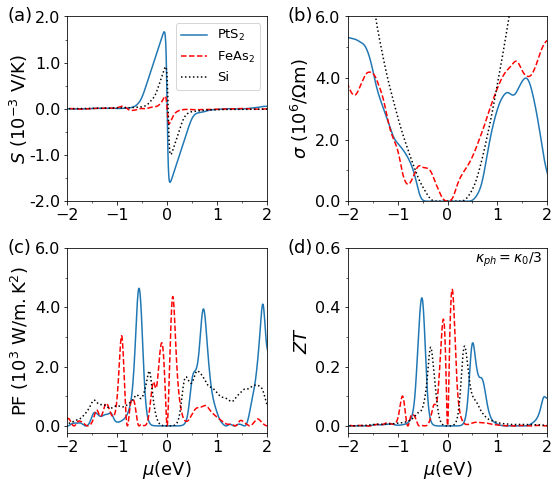

In [99]:
plt.figure(figsize=(8,7))

ax1=plt.subplot(2,2,1)
plt.plot(Ef,S*1000,label='$\mathrm{PtS_2}$')
plt.plot(Ef2,S2*1000,'r--',label='$\mathrm{FeAs_2}$')
plt.plot(EfSi,SSi*1000,'k:',label='Si')
plt.xlim([-2,2])
plt.xticks(range(-2,3,1))
plt.yticks(arange(-2,2.1,step=1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.labelpad=-1
plt.ylabel('$S$ ($\mathrm{10^{-3}~V/K}$)',fontsize=18)
plt.text(-3.2,1.9,'(a)', fontsize=18)
plt.legend(fontsize=13)
plt.tight_layout()

ax2=plt.subplot(2,2,2)
plt.plot(Ef,sigma/1000000)
plt.plot(Ef2,sigma2/1000000,'r--')
plt.plot(EfSi,sigmaSi/1000000,'k:')
plt.xlim([-2,2])
plt.ylim([0,6])
plt.xticks(range(-2,3,1))
plt.yticks(arange(0,6.1,step=2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('$\sigma$ ($\mathrm{10^6/\Omega m}$)',fontsize=18)
plt.text(-3.2,5.85,'(b)', fontsize=18)
plt.tight_layout()

ax3=plt.subplot(2,2,3)
plt.plot(Ef,sigma*S**2*1000,label='$\mathrm{PtS_2}$')
plt.plot(Ef2,sigma2*S2**2*1000,'r--',label='$\mathrm{FeAs_2}$')
plt.plot(EfSi,sigmaSi*SSi**2*1000,'k:',label='Si')
plt.xlim([-2,2])
plt.xticks(range(-2,3,1))
plt.yticks(arange(0,6.1,step=2))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('$\mu(\mathrm{eV})$',fontsize=18)
plt.ylabel('PF ($\mathrm{10^3~W/m.K^2}$)',fontsize=18)
plt.text(-3.2,5.85,'(c)', fontsize=18)
plt.tight_layout()

ax4 = plt.subplot(2,2,4)
plt.plot(Ef,sigma*S**2/(kappa+1)*300,label='$\mathrm{PtS_2}$')
plt.plot(Ef2,sigma2*S2**2/(kappa2+1)*300,'r--',label='$\mathrm{FeAs_2}$')
plt.plot(EfSi,sigmaSi*SSi**2/(kappaSi+1)*300,'k:',label='Si')
plt.xlim([-2,2])
plt.xticks(range(-2,3,1))
plt.yticks(arange(0,0.61,step=0.2))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(0.55,0.55,'$\kappa_{ph} = \kappa_0/3$')
plt.xlabel('$\mu(\mathrm{eV})$',fontsize=18)
plt.ylabel('$ZT$',fontsize=18)
plt.text(-3.2,0.585,'(d)', fontsize=18)
plt.tight_layout()

plt.savefig('Fig11.pdf')

In [ ]:
from numpy import savetxt

savetxt('ZT22_3D.txt',ZT22)
savetxt('ZT24_3D.txt',ZT24)
savetxt('ZT26_3D.txt',ZT26)
savetxt('ZT44_3D.txt',ZT44)
savetxt('ZT46_3D.txt',ZT46)
savetxt('ZT66_3D.txt',ZT66)
savetxt('ZT22p_3D.txt',ZT22p)
savetxt('ZT24p_3D.txt',ZT24p)
savetxt('ZT26p_3D.txt',ZT26p)
savetxt('ZT44p_3D.txt',ZT44p)
savetxt('ZT46p_3D.txt',ZT46p)
savetxt('ZT66p_3D.txt',ZT66p)

savetxt('ZT22_2D.txt',ZT22_2)
savetxt('ZT24_2D.txt',ZT24_2)
savetxt('ZT26_2D.txt',ZT26_2)
savetxt('ZT44_2D.txt',ZT44_2)
savetxt('ZT46_2D.txt',ZT46_2)
savetxt('ZT66_2D.txt',ZT66_2)
savetxt('ZT22p_2D.txt',ZT22p_2)
savetxt('ZT24p_2D.txt',ZT24p_2)
savetxt('ZT26p_2D.txt',ZT26p_2)
savetxt('ZT44p_2D.txt',ZT44p_2)
savetxt('ZT46p_2D.txt',ZT46p_2)
savetxt('ZT66p_2D.txt',ZT66p_2)

savetxt('ZT22_1D.txt',ZT22_1)
savetxt('ZT24_1D.txt',ZT24_1)
savetxt('ZT26_1D.txt',ZT26_1)
savetxt('ZT44_1D.txt',ZT44_1)
savetxt('ZT46_1D.txt',ZT46_1)
savetxt('ZT66_1D.txt',ZT66_1)
savetxt('ZT22p_1D.txt',ZT22p_1)
savetxt('ZT24p_1D.txt',ZT24p_1)
savetxt('ZT26p_1D.txt',ZT26p_1)
savetxt('ZT44p_1D.txt',ZT44p_1)
savetxt('ZT46p_1D.txt',ZT46p_1)
savetxt('ZT66p_1D.txt',ZT66p_1)

# Two-band model with pudding mold dispersion

We will investigate the thermoelectric properties of a material with a pudding mold dispersion, with bandgap $E_g = 2\Delta$:

\begin{equation}
E = \pm(Ak^n+\Delta), \quad ~n~even
\end{equation}

using the two-band model and the constant relaxation time approximation.

$A$ is normalized according to $Ak^n=1$ when $k$ is at the band edge $k=\sqrt{d}\pi$ (Taking the lattice contant $a=1$); that is,

\begin{equation}
A = \left(\frac{1}{\sqrt{d}\pi}\right)^n
\end{equation}

The group velocity of this (2D) material is given by (taking the conduction band for convenience)

\begin{equation}
v = \hbar^{-1} \frac{dE}{dk} = nAk^{n-1} = nA\hbar^{-1} \left(\frac{E-\Delta}{A}\right)^{(n-1)/n}
\end{equation}

while the density of states $\mathcal{D}(E)$ for a two dimensional system will be given by

\begin{equation}
\mathcal{D}(E)=\frac{1}{(2\pi)^2}\int d^2\textbf{k}~\delta(E_\textbf{k}-E) = \frac{1}{(2\pi)}\int k dk~\delta(E_\textbf{k}-E)
\end{equation}

with $dk = dE (nA)^{-1}k^{1-n}$, $k dk = dE (nA)^{-1}k^{2-n}$. Plugging in the value of $k dk$ , we have

\begin{equation}
\mathcal{D}(E) = \frac{1}{(2\pi nA)}\int \left(\frac{E_k-\Delta}{A}\right)^{(2-n)/n} ~\delta(E_\textbf{k}-E) dE_k
\end{equation}

\begin{equation}
\mathcal{D}(E) = \frac{1}{2\pi nA} \left(\frac{E-\Delta}{A}\right)^{(2-n)/n}
\end{equation}

Therefore, the thermoelectric integral for the condunction band can be written as

\begin{equation}
\mathcal{L}_{c,i} = \int_{\Delta}^{\infty} \tau \frac{1}{2\pi nA} \frac{1}{2\hbar^2}\left(\frac{E-\Delta}{A}\right)^{(2-n)/n} \left(nA \left(\frac{E-\Delta}{A}\right)^{(n-1)/n}\right)^2 \left(-\frac{\partial f}{\partial E}\right) (E-\mu)^i dE
\end{equation}

\begin{equation}
\mathcal{L}_{c,i} = \frac{\tau n}{4\pi\hbar^2} \int_{\Delta}^{\infty} (E-\Delta) (k_B T)^{-1} \frac{\exp(\frac{E-\mu}{k_BT})}{(\exp(\frac{E-\mu}{k_BT})+1)^2}(E-\mu)^i dE
\end{equation}

We note that this quantity is independent of the exponent $n$ aside from an extra factor $n$.

To solve this integral, let $(E-\mu)/k_B T = x$, $\mu/k_B T = \eta$, and $\Delta/k_B T = \Delta'$. Then,

\begin{align}
\mathcal{L}_{c,i} &= \frac{\tau n}{4\pi \hbar^2}\int_{\Delta'-\eta}^{\infty} (x+\eta - \Delta')(k_B T)^i x^i \frac{e^x}{(e^x+1)^2} (k_B T) dx \\
\mathcal{L}_{c,i} &= \frac{\tau n(k_B T)^{i+1}}{4\pi \hbar^2}\left(\int_{\Delta'-\eta}^{\infty} x^{i+1} \frac{e^x}{(e^x+1)^2} dx + (\eta-\Delta')\int_{\Delta'-\eta}^{\infty} x^i \frac{e^x}{(e^x+1)^2} dx \right)\\
\mathcal{L}_{c,i} &= \frac{\tau n(k_B T)^{i+1}}{4\pi \hbar^2}(\mathcal{F}_{i+1} (\eta-\Delta') + (\eta-\Delta')\mathcal{F}_{i}(\eta-\Delta'))
\end{align}

where 

\begin{equation}
\mathcal{F}_{i}(a) = \int_{-a}^{\infty} x^i \frac{e^x}{(e^x+1)^2} dx
\end{equation}

Similarly, for the valence band, 

\begin{equation}
E = -Ak^n-\Delta
\end{equation}

\begin{equation}
v = -nA \hbar{-1} k^{n-1} = -nA\hbar^{-1} \left(\frac{-E-\Delta}{A}\right)^{(n-1)/n}
\end{equation}

and

\begin{equation}
\mathcal{D}(E) = \frac{1}{(2\pi)}\int k dk~\delta(E_\textbf{k}-E)
\end{equation}

with $k dk = -k/(nAk^{n-1}) dE = -\frac{1}{nA}(-E-\Delta)^{(2-n)/n} dE$ 

\begin{equation}
\mathcal{D}(E) = \frac{1}{2\pi nA} \left(\frac{-E-\Delta}{A}\right)^{(2-n)/n}
\end{equation}

and 

\begin{equation}
\mathcal{L}_{v,i} = \frac{\tau n}{4\pi\hbar^2} \int_{-\infty}^{-\Delta} (-E-\Delta) (k_B T)^{-1} \frac{\exp(\frac{E-\mu}{k_BT})}{(\exp(\frac{E-\mu}{k_BT})+1)^2}(E-\mu)^i dE
\end{equation}

Using a similar substitution $x = (E-\mu)/k_B T$,

\begin{equation}
\mathcal{L}_{v,i} = -\frac{\tau n}{4\pi\hbar^2} \int_{-\infty}^{-\Delta'-\eta} (x+\eta+\Delta') \frac{e^x}{(e^x+1)^2} (x)^i (k_B T)^i d(k_B T x)
\end{equation}

\begin{equation}
\mathcal{L}_{v,i} = -\frac{\tau n (k_B T)^{i+1}}{4\pi\hbar^2} \left(\int_{-\infty}^{-\Delta'-\eta} x^{i+1} \frac{e^x}{(e^x+1)^2} dx + (\eta+\Delta') \int_{-\infty}^{-\Delta'-\eta} x^i \frac{e^x}{(e^x+1)^2} dx \right)
\end{equation}

3D and 1D

For a 3D system,

\begin{equation}
\mathcal{L}_{c,i} = \int_{\Delta}^{\infty} \tau \frac{1}{2\pi^2 nA} \frac{1}{3\hbar}\left(\frac{E-\Delta}{A}\right)^{(3-n)/n} \left(nA \left(\frac{E-\Delta}{A}\right)^{(n-1)/n}\right)^2 \left(-\frac{\partial f}{\partial E}\right) (E-\mu)^i dE
\end{equation}

\begin{equation}
\mathcal{L}_{c,i} = \frac{\tau n A}{6\pi^2 \hbar} \int_{\Delta}^{\infty} \left(\frac{E-\Delta}{A}\right)^{(1+n)/n} \frac{\exp(\frac{E-\mu}{k_BT})}{(\exp(\frac{E-\mu}{k_BT})+1)^2}(E-\mu)^i dE
\end{equation}

By substituting $(E-\mu)/k_B T = x$ we have

\begin{equation}
\mathcal{L}_{c,i}=\frac{\tau n (k_B T)^{i+1+1/n}}{6\pi^2 \hbar^2 A^{1/n}} \int_{\Delta'-\eta}^{\infty} (x+\eta-\Delta')^{(1+n)/n}(x)^i \frac{\exp(x)}{(\exp(x)+1)^2} dx 
\end{equation}

For the valence band,

\begin{equation}
\mathcal{L}_{c,i}=\frac{\tau n (k_B T)^{i+1+1/n}}{6\pi^2 \hbar^2 A^{1/n}} \int_{-\infty}^{-\Delta'-\eta} (-x-\eta-\Delta')^{(1+n)/n}(x)^i \frac{\exp(x)}{(\exp(x)+1)^2} dx 
\end{equation}